# Изучение закономерностей, определяющих успешность игр

**Оглавление:**
    
    1. Задача проекта.
    2. Описание данных.
    3. Загрузка данных.
    4. Подготовка данных
        4.1. Замена названия столбцов.
        4.2. Преобразование данных в нужные типы.
        4.3. Обработка пропусков.
        4.4. Подсчет суммарных продаж.
    5. Исследовательский анализ данных
        5.1. Изучение релиза игр в разные годы.
        5.2. Изучение продаж игр по платформам.
        5.3. Выбор актуального периода.
        5.4. Выбор потенгицально прибыльных платформ.
        5.5. Построение графиков боксплотов по глобальным продажам игр в разбивке по платформам.
        5.6. Изучение влияния оценки критиков и пользователей на продажи внутри одной популярной платформы.
        5.7. Определение высоких и низких продаж игр по жанрам.
    6. Портрет пользователя каждого региона
        6.1. Самые популярные платформы (топ-5).
        6.2. Самые популярные жанры (топ-5).
        6.3. Влияние рейтинга ESRB на продажи.
    7. Проверка гипотез
        7.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        7.2. Средние пользовательские рейтинги платформ Action и Sports разные.
    8. Общий вывод.


## Задача проекта

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры. 

## Описание данных:

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг - компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import random
from scipy import stats as st

In [2]:
df = pd.read_csv('/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df = df.rename(columns={'Name': 'title_game', 'Genre': 'genre_game', 'Rating': 'age_rating'})

Небольшое количество строк, можно поработать с регистром и типом данных. Изменены названия столбцов. Есть пропуски в оценках критиков и пользователей, а также в рейтинге. Можем предположить, что игры не участвовали в оценке, либо процесс оценки не завершен, поэтому наиболее корректнее заменить на пропуски.

## Подготовка данных

### Замена названия столбцов

In [5]:
#Заменим регистр названия столбцов
df.columns = df.columns.str.lower()

In [6]:
#Заменим регистр содержимого столбцов
names = ['genre_game', 'title_game', 'platform', 'age_rating']
for i in names:
    df[i] = df[i].str.lower()
display(df)

,title_game,platform,year_of_release,genre_game,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
#Изучим содержимое
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

### Преобразование данных в нужные типы

In [8]:
#Заменим год релиза, чтобы работать было удобнее.
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [9]:
#Изучим объем памяти
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_game       16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre_game       16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  age_rating       9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 5.6 MB


In [10]:
#Заменим тип данных для уменьшения объема памяти
x = ['genre_game', 'platform']
for i in x:
    df[i] = df[i].astype('category')

In [11]:
#Проверим результата
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   title_game       16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  Int64   
 3   genre_game       16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       10014 non-null  object  
 10  age_rating       9949 non-null   object  
dtypes: Int64(1), category(2), float64(5), object(3)
memory usage: 3.6 MB


### Обработка пропусков

In [12]:
#Проверим на пропуски
df.isna().sum()

title_game            2
platform              0
year_of_release     269
genre_game            2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
age_rating         6766
dtype: int64

Поскольку пропущенных значений меньше 2% можем их удалить.

In [13]:
df = df.dropna(subset=['title_game', 'year_of_release'])
df.isna().sum()

title_game            0
platform              0
year_of_release       0
genre_game            0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
age_rating         6676
dtype: int64

In [14]:
#проверим на дубликаты
df.duplicated().sum() 

0

In [15]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
df['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 37, dtype: Int64

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
#Изучим строки со значением 'tbd'
df[df['user_score'] == 'tbd']

,title_game,platform,year_of_release,genre_game,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
718,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


Лучше уточнить, что именно здесь имеется ввиду. 

В данном случае, будем рассматривать это как неизвестное значение "To Be Determined" и заменим его на пропуски. 

In [19]:
#Заменим 'tbd' на пропуски
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
pd.set_option('mode.chained_assignment', None)

In [20]:
#Изменим тип данных для работы с гипотезами
df['user_score'] = df['user_score'].str.replace(',','').astype(np.float64)

In [21]:
df['age_rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Категории E и K-A обозначают одинаковые возрастные ограничения, а значит можем их объединить. Категория RP нерепрезентативна для исследования, т.к ожидает присвоения рейтинга. Пропуски в значениях могут говорить о том, что игры вне рейтинга ESRB, однако их также надо учитывать при исследовании. 

**Описание возрастных категоий**
<ul>
<li>e - для возрастной категории от 6 лет.</li>
<li>m - 17 +</li>
<li>t - Игра подходит для лиц от 13 лет</li>
<li>e10+ - Для всех от 10 лет и старше</li>
<li>k-a - для возрастной категории от 6 лет.</li>
<li>ao - старше 18 лет</li>
<li>ec - Для детей от 3 лет</li>
<li>rp - ожидает присвоения рейтинга</li>
</ul>

In [22]:
#объединим категории 
df['age_rating'] = df['age_rating'].replace('k-a', 'e')
df['age_rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'ao', 'ec', 'rp'], dtype=object)

In [23]:
#изучим количество значений "rp"
df.loc[df['age_rating'] == 'rp', 'age_rating'].count()

1

In [24]:
#удалим категории rp
df = df.drop(df[df.age_rating == 'rp'].index)

In [25]:
df['age_rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'ao', 'ec'], dtype=object)

In [26]:
#Заменим пропущенные значения 
df['age_rating'] = df['age_rating'].replace(np.NaN, 'miss')

In [27]:
df['age_rating'].unique()

array(['e', 'miss', 'm', 't', 'e10+', 'ao', 'ec'], dtype=object)

### Подсчет суммарных продаж 

In [28]:
#Добавим столбец суммарных продаж
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,title_game,platform,year_of_release,genre_game,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,miss,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,miss,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,miss,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,miss,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,miss,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,miss,0.01


**В процессе предобработки выполнены:**
- замена регистра столбцов и их содержимого;
- замена типа данных выборочных значений;
- обработка пропусков в столбцах;
- замена значений 'tbd' на пропуски;
- добавление безрейтинговой категории "miss";
- добавление столбца суммы продаж.

## Исследовательский анализ данных

### Изучение релиза игр в разные годы

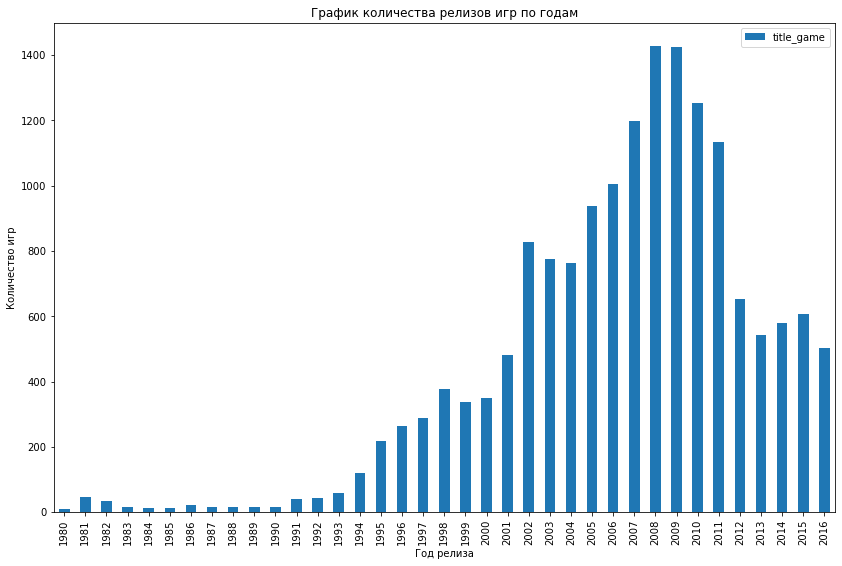

In [29]:
#Построим гистограмму релиза
df_1 = df.pivot_table(index='year_of_release', values='title_game', aggfunc='count').plot(kind='bar', title='График количества релизов игр по годам', figsize=(14,9))
plt.xlabel("Год релиза")
plt.ylabel("Количество игр")
plt.show()

После "скайрима" требования к играм возрасли и производство игр сократилось почти в 2. Но это не точно. 

Можно не брать во внимание игры до 1995г, т.к их было выпущено очень мало .

### Изучение продаж игр по платформам

In [30]:
df['platform'].unique()

['wii', 'nes', 'gb', 'ds', 'x360', ..., 'ng', 'tg16', '3do', 'gg', 'pcfx']
Length: 31
Categories (31, object): ['2600', '3do', '3ds', 'dc', ..., 'ws', 'x360', 'xb', 'xone']

Построим цикл для отображения продаж по платформам за разные периоды.

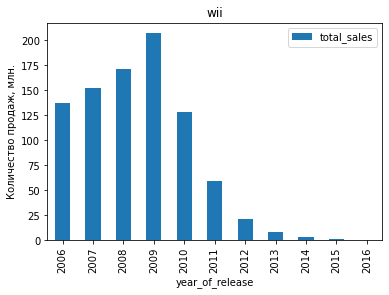

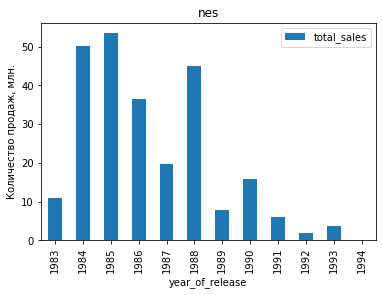

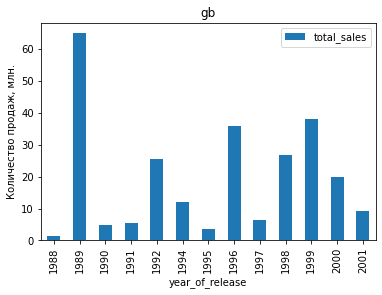

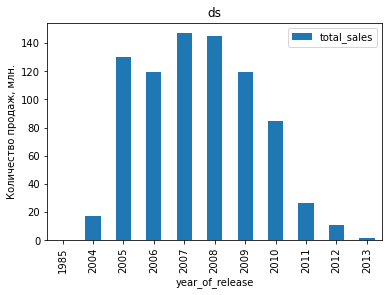

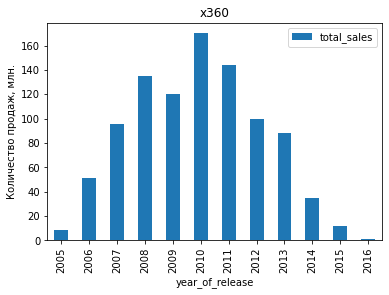

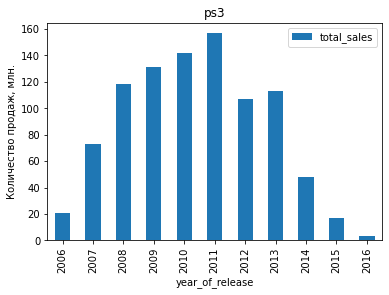

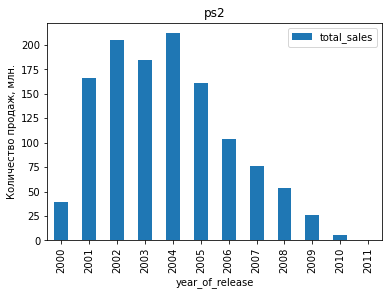

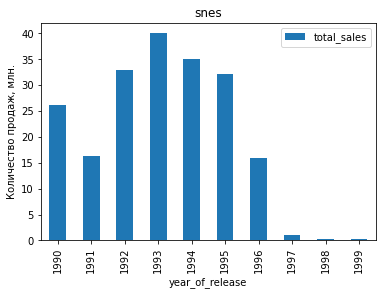

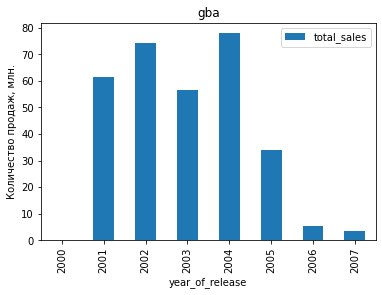

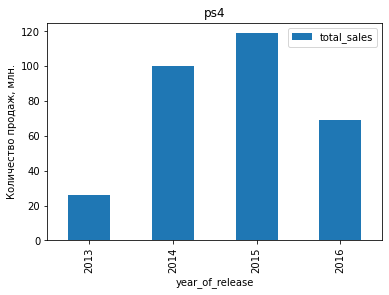

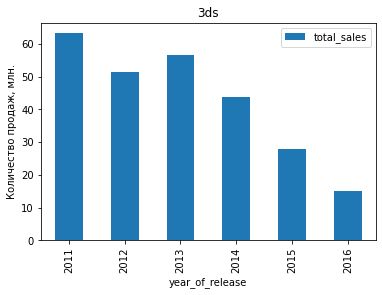

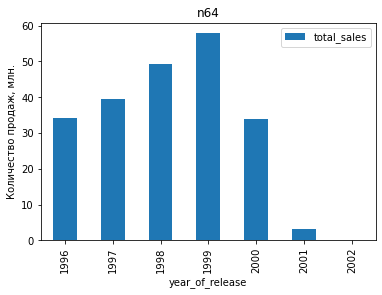

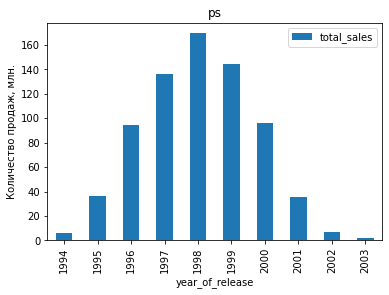

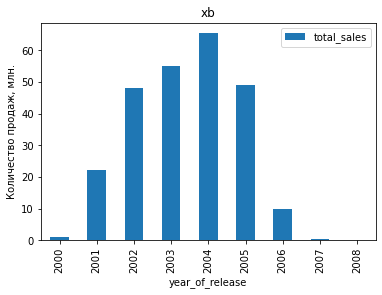

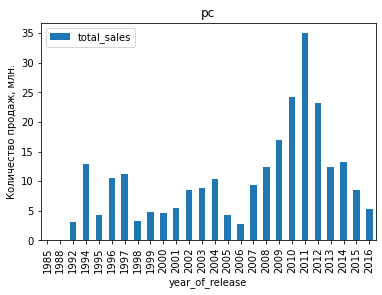

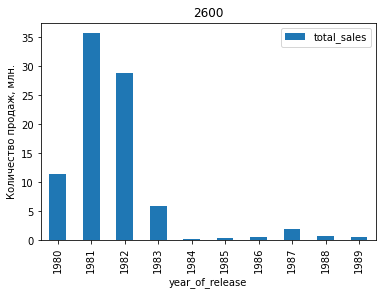

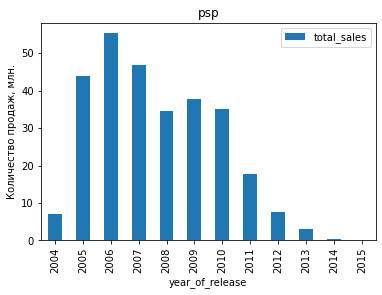

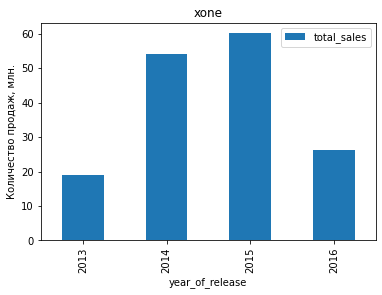

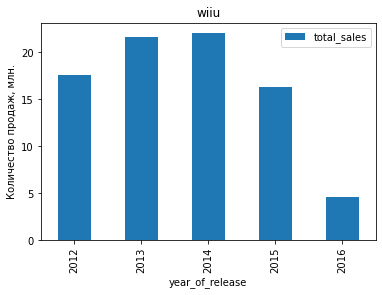

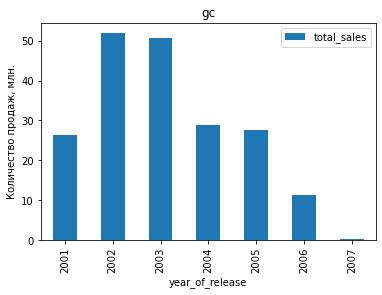

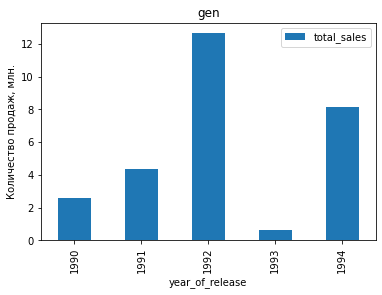

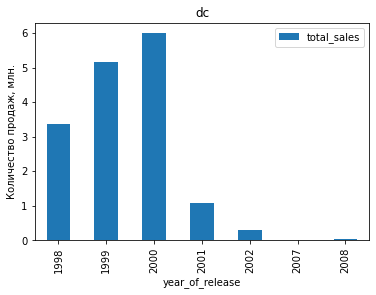

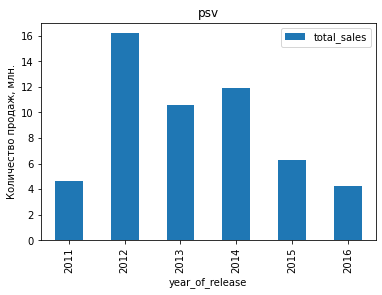

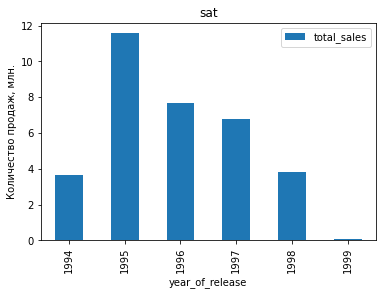

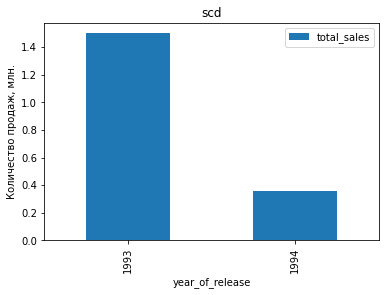

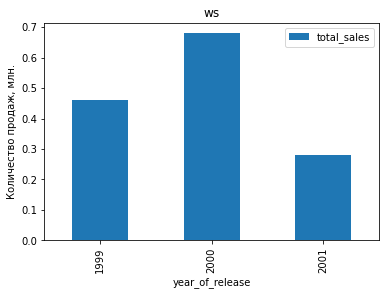

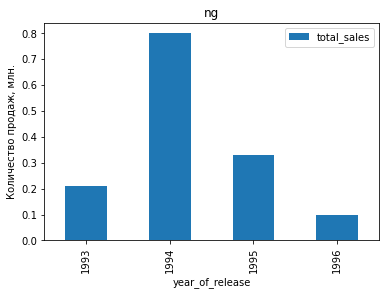

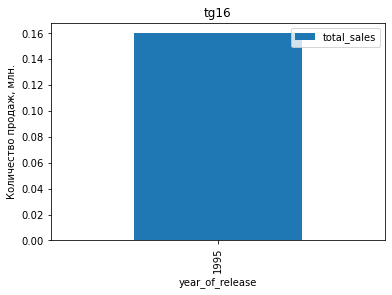

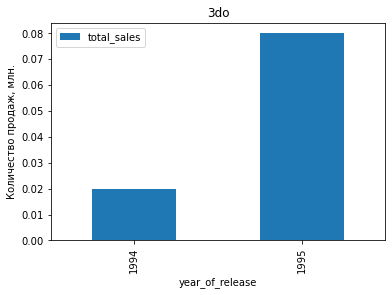

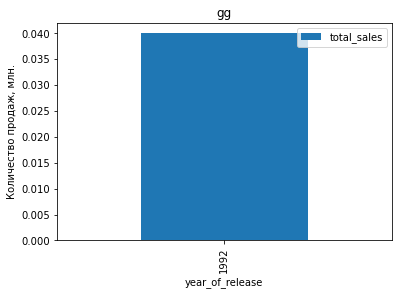

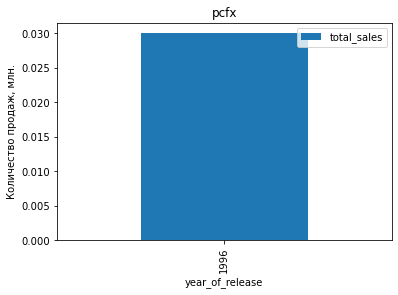

In [31]:
platforms = ['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx']

for platform in platforms:
   
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', title=platform)
    plt.ylabel('Количество продаж, млн.')
    plt.show()

In [32]:
#Определим самые продаваемые платформы
df_2 = df.pivot_table(index='platform', values='total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False)
df_2

,total_sales
platform,
ps2,2127
ds,2121
ps3,1306
wii,1286
x360,1232
psp,1193
ps,1190
pc,956
gba,811


Периодичность выпуска новых платформ можно попробовать рассчитать по серии ПС, в среднем это 6-7 лет. 

### Выбор актуального периода  

In [33]:
#Выборка актуального периода
df_live_period = df[df['year_of_release'] > 2014]
df_live_period

,title_game,platform,year_of_release,genre_game,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,miss,14.63
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,miss,7.98
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,miss,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,the longest 5 minutes,psv,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,miss,0.01
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,miss,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,miss,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,miss,0.01


### Выбор потенциально прибыльных платформ

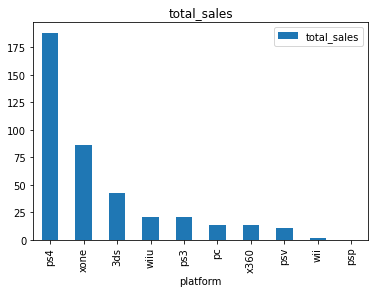

In [34]:
#Гистограмма продаж по платформам
df_leader = df_live_period.pivot_table(index='platform', values='total_sales', aggfunc='sum')
df_leader.sort_values(by='total_sales', ascending=False).head(10).plot(kind='bar', title='total_sales')

plt.show()

Топ продаж - ps4, xone, 3ds, wiiu, ps3. Все платформы показывают спад продаж.

### Построение графиков боксплотов по глобальным продажам игр в разбивке по платформам

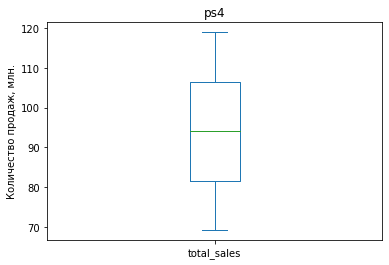

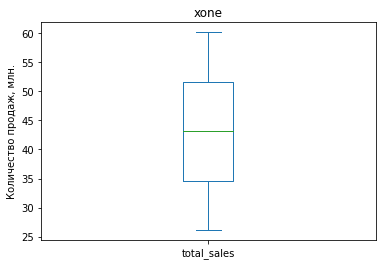

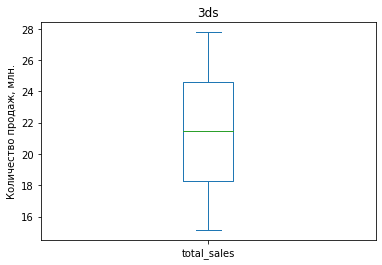

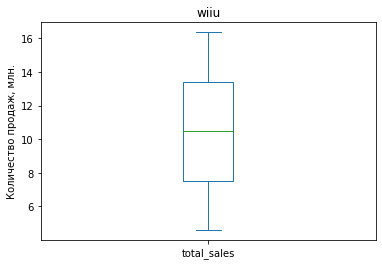

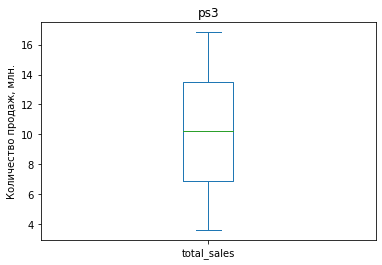

In [35]:
#Изучим разброс продаж
platforms = ['ps4', 'xone', '3ds', 'wiiu', 'ps3']
for platform in platforms:
    
    df_live_period[df_live_period['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='box', title=platform)
    plt.ylabel('Количество продаж, млн.')
    plt.show()

В период с 2014 по 2016 годы на глобальном рынке наибольшее среднее количество продаж приходится на платформу PS-4 почти 95 млн, с отрывом почти в 2 раза приходится на Xbox One ~ 45 млн,  далее 3ds ~ 22 млн, замыкает пара практически с одинаковыми значениями Wiiu и Ps3 по ~ 10 млн. 

### Изучение влияния оценки критиков и пользователей на продажи внутри одной популярной платформы

In [36]:
df_ps_4 = df_live_period[df_live_period['platform'] == 'ps4']
df_ps_4

,title_game,platform,year_of_release,genre_game,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,miss,14.63
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,miss,7.98
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,m,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69.0,7.5,miss,0.01
16503,shin hayarigami 2,ps4,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,miss,0.01
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61.0,7.9,t,0.01
16530,carmageddon: max damage,ps4,2016,action,0.01,0.00,0.00,0.00,51.0,5.5,m,0.01


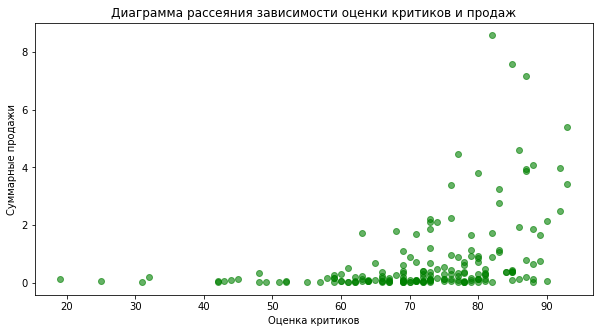

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_ps_4['critic_score'], y = df_ps_4['total_sales'], color='green', alpha=0.6)
plt.xlabel("Оценка критиков")
plt.ylabel("Суммарные продажи")
plt.title('Диаграмма рассеяния зависимости оценки критиков и продаж')
plt.show()

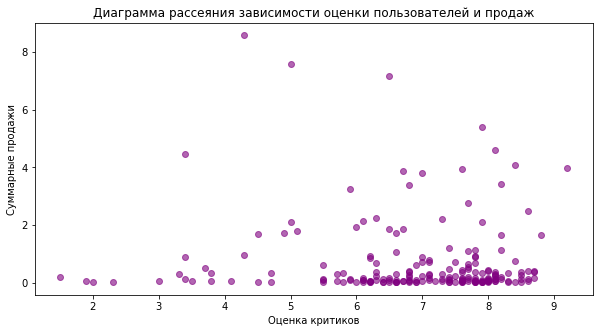

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_ps_4['user_score'], y = df_ps_4['total_sales'], color='purple', alpha=0.6)
plt.xlabel("Оценка критиков")
plt.ylabel("Суммарные продажи")
plt.title('Диаграмма рассеяния зависимости оценки пользователей и продаж')
plt.show()

In [39]:
#Корреляция зависимости продаж от оценок критиков и пользователей
platform = ['ps4', 'xone', '3ds', 'wiiu', 'ps3']
for platform in platforms:
 
    display(df_live_period[df_live_period['platform'] == platform][['total_sales', 'user_score','critic_score']].corr())

,total_sales,user_score,critic_score
total_sales,1.000000,-0.059738,0.392849
user_score,-0.059738,1.000000,0.533330
critic_score,0.392849,0.533330,1.000000


,total_sales,user_score,critic_score
total_sales,1.000000,-0.041467,0.430889
user_score,-0.041467,1.000000,0.459443
critic_score,0.430889,0.459443,1.000000


,total_sales,user_score,critic_score
total_sales,1.000000,0.198796,0.177575
user_score,0.198796,1.000000,0.791853
critic_score,0.177575,0.791853,1.000000


,total_sales,user_score,critic_score
total_sales,1.000000,0.363519,0.317046
user_score,0.363519,1.000000,0.678858
critic_score,0.317046,0.678858,1.000000


,total_sales,user_score,critic_score
total_sales,1.000000,-0.165295,NaN
user_score,-0.165295,1.000000,NaN
critic_score,NaN,NaN,NaN


На продажи игр оценки критиков оказывают слабое влияние. Влияния на продажи от оценки пользователей - нет, за исключением платформы WIIU, здесь зависимость выражена слабо.

### Определение высоких и низких продаж игр по жанрам

In [40]:
#Медианные значения продаж игр по жанрам
df_genre = df_live_period.pivot_table(index='genre_game', values='total_sales', aggfunc='mean')
df_genre.sort_values(by='total_sales', ascending=False)

,total_sales
genre_game,
shooter,1.305309
sports,0.601215
role-playing,0.422879
fighting,0.334324
platform,0.331429
racing,0.258571
action,0.236961
simulation,0.228788
misc,0.199577


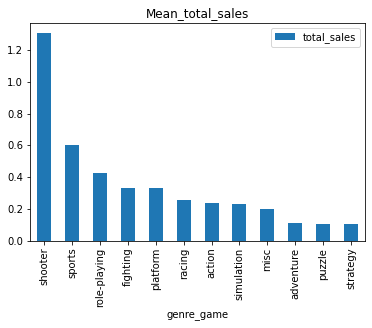

In [41]:
df_genre = df_live_period.pivot_table(index='genre_game', values='total_sales', aggfunc='mean')
df_genre.sort_values(by='total_sales', ascending=False).plot(kind='bar', title='Mean_total_sales')
plt.show()

**В ходе исследования:**
- определили актуальный период и топ 5 продаваемых платформ;
- изучили зависимости продаж от оценки пользователей и критиков;
- выделили топ популярных жанров: шутеры, спортивные, рпг;
- а также топ жанров с низкими продажами: стратегии, пазлы, приключения.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5).

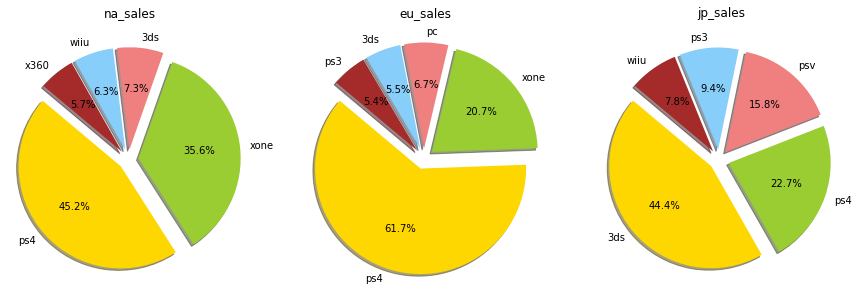

In [42]:
#Построение "пирогов" с долевыми значениями продаж платформ по регионам

regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    
    df_share_of_region = df_live_period.pivot_table(index='platform',
                                                    values= regions_sales[i],
                                                    aggfunc={regions_sales[i] :'sum'})\
                                                    .rename(columns={regions_sales[i]: 'sum'})\
                                                    .sort_values('sum', ascending=False).head()
    
    labels = df_share_of_region.index
    sizes = df_share_of_region.values
    sizes_flattened = [item for sublist in sizes for item in sublist]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'brown']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1) 

# Plot
    axs[i].pie(sizes_flattened, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    axs[i].axis('equal')
    axs[i].set_title(regions_sales[i])


В Северной Америке около половины продаж приходится на PS4 - 45,2%, треть занимает XONE - 35,6%, далее 3DS - 7.3%, WIIU - 6,3% и X360 - 5,7%. 

В Европе заметно преобладает PS4 - 61.7%, далее XONE - 20,7%, и почти равные доли занимают: PC - 6.7%, 3DS - 5.5%, PS3 - 5.4%

Популярность платформ в Японии: 3DS - 44.4%, PS4 - 22.7%, PSV - 15.8%, PS3 - 9.4% и WIIU - 7.8%

### Самые популярные жанры (топ-5).

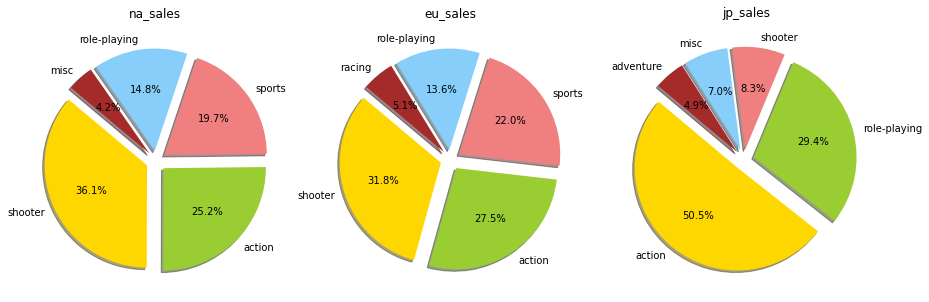

In [43]:
#Построение "пирогов" с долевыми значениями жанровых предпочтений по регионам
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    df_share_of_region = df_live_period.pivot_table(index='genre_game',
                                                    values=regions_sales[i],
                                                    aggfunc={regions_sales[i]:'sum'})\
                                                    .rename(columns={regions_sales[i]: 'sum'})\
                                                    .sort_values('sum', ascending=False).head()
    labels = df_share_of_region.index
    sizes = df_share_of_region.values
    sizes_flattened = [item for sublist in sizes for item in sublist]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'brown']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)  

# Plot
    axs[i].pie(sizes_flattened, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    axs[i].axis('equal')
    axs[i].set_title(regions_sales[i])

В Сев.Америке жанровые предпочтения выглядят следующим образом: шутеры - 36.1%, экшен - 25.2%, спортивные - 19,7%, рпг - 14.8%, другое - 4.2%

Аналогичные игровые вкусы у Европы с разницей в жанрах в 2-6%, однако наименее популярные игры здесь это гонки - 5.1% 

В Японии наблюдается заметная "непохожесть" на остальные регионы. Половина пользователей предпочитают экшн-игры - 50.5%, треть выбирают рпг-29.4%, остальные: шутеры - 8,3%, другое - 7%, приключения - 4.9%

### Влияние рейтинга ESRB на продажи

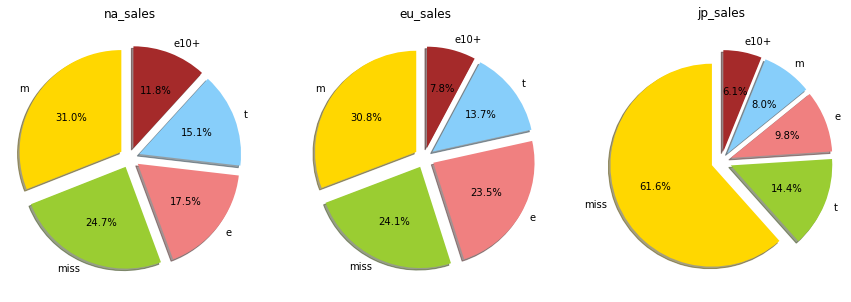

In [44]:
#Построение "пирогов" с возрастными предпочтениями по регионам
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    df_share_of_region = df_live_period.pivot_table(index='age_rating',
                                                    values=regions_sales[i],
                                                    aggfunc={regions_sales[i]:'sum'})\
                                                    .rename(columns={regions_sales[i]: 'sum'})\
                                                    .sort_values('sum', ascending=False).head()
    labels = df_share_of_region.index
    sizes = df_share_of_region.values
    sizes_flattened = [item for sublist in sizes for item in sublist]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'brown']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# Plot
    axs[i].pie(sizes_flattened, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(regions_sales[i])

В Северной Америке и Европе преобладают продажи игр с возрастным ограничением 17+ (31%/30.8%), далее в порядке убывания расположились: "без возраста" - 24.7%/24.1% , для детей (6+) - 17.5%/23,5% , старше 13 лет - 15.1%/13.7%, замыкает рейтинг старше 10 лет - 11.8%/7.8%,  соответственно. 

Явное различие между регионами наблюдается с Японией, здесь большей популярностью пользуются игры без возрастных ограничений - 61.6%. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [45]:
#Нулевая гипотеза: средние значения пользовательного рейтинга Xbox One и PC равны

#Альтернативная гипотеза: не равны

#Проверка нулевой гипотезы о равенстве средних значений XONE и PC
sample_xone = df_live_period[df_live_period['platform'] == 'xone']['user_score']
sample_pc = df_live_period[df_live_period['platform'] == 'pc']['user_score']
results = st.ttest_ind(sample_xone, sample_pc, nan_policy='omit')
alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза имеет место быть. Альтеранативная гипотеза не рассматривается')

p-значение:  0.2778542084733873
Нулевая гипотеза имеет место быть. Альтеранативная гипотеза не рассматривается


### Средние пользовательские рейтинги жанров Action и Sports разные.

In [46]:
#Нулевая гипотеза: средние значения пользовательного рейтинга жанров Action и Sports равны

#Альтернативная гипотеза: не равны

#Проверка нулевой гипотезы о равенстве средних значений жанров Action и Sports
sample_xone = df_live_period[df_live_period['genre_game'] == 'action']['user_score']
sample_pc = df_live_period[df_live_period['genre_game'] == 'sports']['user_score']
results = st.stats.ttest_ind(sample_xone, sample_pc, equal_var = False, nan_policy='omit')
alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  5.971635499205881e-10
Отвергаем нулевую гипотезу


Таким образом, нет оснований утверждать, что средние значения пользовательного рейтинга жанров Action и Sports равны

## Общий вывод

Целью проделанной работы является определение закономерностей успешности игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Этапы работы и полученые значения:
1. Подготовка данных:
    - произведена замена типа данных и названий столбцов в соотвествии с их содержимом;
    - обработаны пропущенные значения, менее 2% - были удалены;
    - добавлен столбец с подсчетом суммарных продаж игр.
    
    
2. Проведение исследования: 
    - изучены периоды продаж игр и построено распеределение продаж платформ по годам, 
      благодаря чему определен срок появления новых платформ - 6-7 лет;
    - выбран актуальный период для прогноза с 2014 по 2016 гг;
    - топ продаж приходится на платформы: ps4 , xone, 3ds, wiiu, ps3.
      Все платформы показывают спад продаж;
    - изучены корреляции оценки критиков и пользователей на продажи игр по платформам:
        - ps4 = 0.393(слабо выражена)/-0.06(корреляции нет);
        - xone = 0.431(слабо выражена)/-0.04(корреляции нет);
        - 3ds = 0.177(корреляции нет)/0.2(корреляции нет);
        - wiiu = 0.317(слабо выражена)/0.36(слабо выражена);
    - выявлены жанры с высокими продажами (млн):
        - шутеры (1,305);
        - спортивные (0,601);
        - рпг (0.423);
    - и с низкими продажами (млн): 
        - стратегии (0.1027);
        - пазлы (0.1028);
        - приключения (0.1089);
        
        
3. Изучение пользователя по регионам:  
    - Северная Америка:
        - Популярные платформы: PS4(45.2%), Xbox One(35.6%), 3DS(7.3%), WIIU(6.3%), Xbox 360(5.7%);
        - Основные жанры игр: 36.1% - шутеры, 25.2% - экшены, 19.7% - спортивные, 14.8% - рпг, 4.2% - смешанные;
        - Игры с возрастными ограничениями: 17+ (31.0%), без ограничений (24.7%), 6+ (15.5%), 13+ (15.1%), 10+ (11.8%).
    - Европа:
        - Популярные платформы: PS4(61.7%), Xbox One(20.7%), PC(6.7%), 3DS(5.5%), PS3(5.4%);
        - Основные жанры игр: 36.8% - шутеры, 27.5% - экшены, 22.0% - спортивные, 13.6% - рпг, 5.1% - гонки;
        - Игры с возрастными ограничениями: 17+ (30.8%), без ограничений (24.1%), 6+ (23.5%), 13+ (13.7%), 10+ (7.6%).
    - Япония:
        - Популярные платформы: 3DS(44.4%), PS4(22.7%), PSV(15.8%), PS3(9.4%), WIIU(7.8%);
        - Основные жанры игр: 50.5% - экшены, 29.4% - рпг, 8.3% - шутеры, 7.0% - смешанные, 4.9% - приключения;
        - Игры с возрастными ограничениями: без ограничений (61.6%), 13+ (14.4%), 6+ (9.8%), 17+ (8.0%), 10+ (6.1%).
        
        
4. Проверка гипотез 
    
   Результат проведения проверок двух гипотез:
        - Можно предположить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        - Нет оснований утверждать, что средние значения пользовательского рейтинга жанров Action и Sports равны. 
        
   На основании проведенного анализа, можно наблюдать закономерности и выделить потенциально прибыльные продукты для каждого региона.